# Week 5: Matplotlib Visualizations - Campaign Analysis

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
import pandas as pd
df = pd.read_csv('Ads Data Revenue.csv')

In [81]:
print(df.head())

   Campaign ID      Timestamp      Date InventoryType   Ad Type  \
0     121001.0  2014-09-03-10  9/3/2014       Format1  Inter217   
1     121002.0  2014-09-03-13  9/3/2014       Format2  Inter217   
2     121003.0  2014-09-03-06  9/3/2014       Format2  Inter218   
3     121004.0  2014-09-02-19  9/2/2014       Format3  Inter217   
4     121005.0  2014-09-02-22  9/2/2014       Format2  Inter219   

  Available_Impressions Matched_Queries Impressions  Clicks       Spend  Fee  \
0             4,229,052       2,719,650   2,652,364   5,800   $4,054.60  33%   
1            22,425,309      12,316,305  11,949,634  23,280  $19,739.63  23%   
2             3,990,076       2,491,170   2,407,854   3,719      $4,880  33%   
3             3,810,657       1,421,610   1,315,055   8,809   $1,985.86  35%   
4            19,873,340      11,135,727  10,716,366  16,997  $14,308.05  25%   

      Revenue    CTR    CPM    CPC  
0   $2,716.58  0.22%  $1.53  $0.70  
1  $15,199.52  0.19%  $1.65  $0.85  
2   $

In [82]:
num_cols = ["Available_Impressions", "Matched_Queries", "Impressions", "Clicks","Spend", "Revenue", "CTR", "CPM", "CPC"]

In [83]:
for col in num_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace("$", "", regex=False)
    df[col] = df[col].str.replace("%", "", regex=False)
    df[col] = df[col].str.replace(",", "", regex=False)
    df[col] = df[col].astype(float)

In [84]:
df = df[df["Campaign ID"].notna()]

In [85]:
df.tail()

,Campaign ID,Timestamp,Date,InventoryType,Ad Type,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
994,121995.0,2014-09-05-10,9/5/2014,Format4,Inter218,22047.0,13750.0,3602.0,505.0,60.32,35%,39.21,14.02,16.75,0.12
995,121996.0,2014-09-05-02,9/5/2014,Format4,Inter219,7027.0,3728.0,1041.0,89.0,12.40,35%,8.06,8.55,11.91,0.14
996,121997.0,2014-09-05-14,9/5/2014,Format6,Inter217,17147.0,9841.0,2727.0,300.0,54.11,35%,35.17,11.00,19.84,0.18
997,121998.0,2014-09-05-05,9/5/2014,Format6,Inter218,1930.0,946.0,404.0,49.0,5.21,35%,3.39,12.13,12.90,0.11
998,121999.0,2014-09-05-03,9/5/2014,Format6,Inter219,4015.0,2217.0,581.0,81.0,11.57,35%,7.52,13.94,19.92,0.14


In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign ID            999 non-null    float64
 1   Timestamp              999 non-null    object 
 2   Date                   999 non-null    object 
 3   InventoryType          999 non-null    object 
 4   Ad Type                999 non-null    object 
 5   Available_Impressions  999 non-null    float64
 6   Matched_Queries        999 non-null    float64
 7   Impressions            999 non-null    float64
 8   Clicks                 999 non-null    float64
 9   Spend                  999 non-null    float64
 10  Fee                    999 non-null    object 
 11  Revenue                999 non-null    float64
 12  CTR                    999 non-null    float64
 13  CPM                    999 non-null    float64
 14  CPC                    999 non-null    float64
dtypes: float64(

In [87]:
df.describe()

,Campaign ID,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC
count,999.000000,9.990000e+02,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,121500.000000,2.594612e+06,1.469426e+06,1.413324e+06,10941.054054,2916.767968,2086.440951,5.725495,7.192192,0.369439
std,288.530761,5.175547e+06,2.896215e+06,2.804629e+06,18319.821403,4454.922411,3424.556743,6.204903,6.808334,0.332095
min,121001.000000,2.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121250.500000,6.370450e+04,2.714100e+04,2.089600e+04,546.500000,199.215000,129.490000,0.220000,1.550000,0.110000
50%,121500.000000,5.833660e+05,3.315820e+05,3.065830e+05,4426.000000,1433.420000,931.720000,0.600000,2.480000,0.200000
75%,121749.500000,2.412408e+06,1.325968e+06,1.264398e+06,12281.500000,3083.445000,2065.905000,11.700000,12.790000,0.620000
max,121999.000000,2.714680e+07,1.422628e+07,1.371439e+07,101565.000000,21792.700000,17216.230000,28.330000,46.310000,1.560000


## Impressions vs Clicks

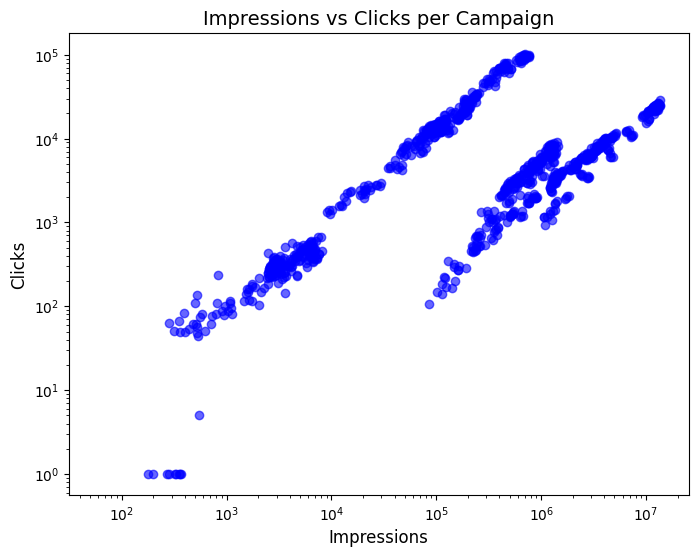

In [102]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Impressions"], df["Clicks"], color='blue', alpha=0.6)
ax.set_title("Impressions vs Clicks per Campaign", fontsize=14)
ax.set_xlabel("Impressions", fontsize=12)
ax.set_ylabel("Clicks", fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

Analysis:

- There is a clear positive correlation between impressions and clicks. As campaigns receive more impressions, they generally also receive more clicks.
- Two main data clusters are observed, indicating that there could be at least two types of campaigns with different click and impression behavior patterns.
- Most campaigns show a proportional relationship between impressions and clicks. However, some campaigns are less effective despite having many impressions.


## Spend vs Revenue

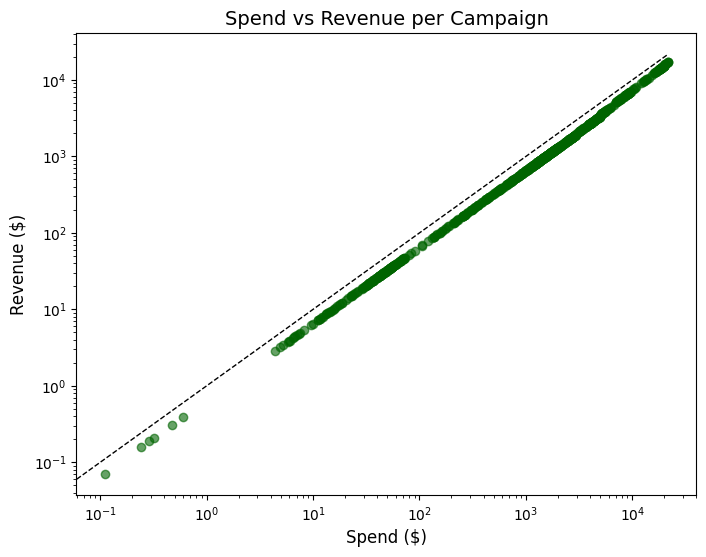

In [160]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df["Spend"], df["Revenue"], color='darkgreen', alpha=0.6)
max_val = max(df['Spend'].max(), df['Revenue'].max())
ax.plot([0, max_val], [0, max_val], color='black', linestyle='--', linewidth=1)
ax.set_title("Spend vs Revenue per Campaign", fontsize=14)
ax.set_xlabel("Spend ($)", fontsize=12)
ax.set_ylabel("Revenue ($)", fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

Analysis:

- There is a very strong, positive linear relationship between spend and revenue. The more a campaign spends, the greater the revenue generated.
- The vast majority of points are above the dashed line, indicating that most campaigns are generating more revenue than they spend.
- There are very few points below the line, indicating campaigns that are not generating enough revenue to cover their spend.

## Top 10 Campaigns by CPC

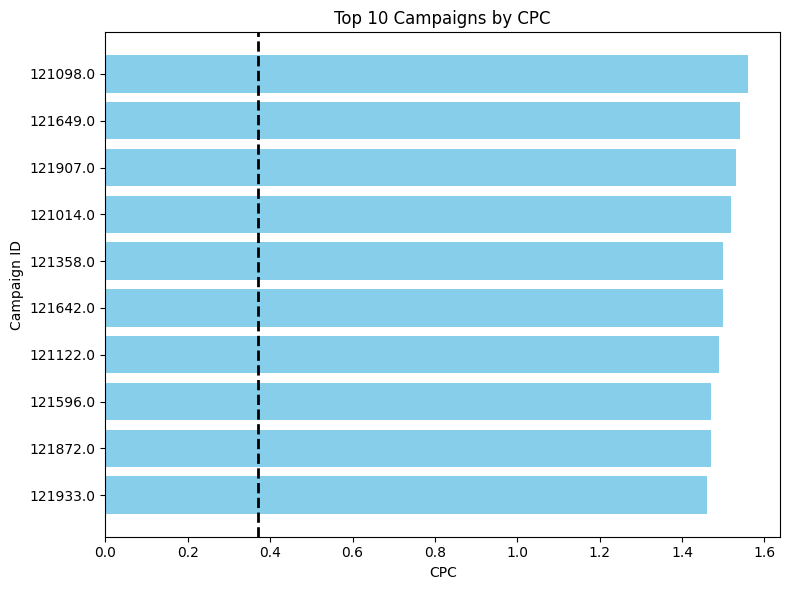

In [168]:
top10 = df.nlargest(10, 'CPC')

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(top10['Campaign ID'].astype(str), top10['CPC'], color='skyblue')
ax.axvline(avg_cpc, color='black', linestyle='--', linewidth=2, label=f'Average CPC: {avg_cpc:.2f}')
ax.set_xlabel('CPC')
ax.set_ylabel('Campaign ID')
ax.set_title('Top 10 Campaigns by CPC')
ax.invert_yaxis()

fig.tight_layout()
plt.show()



Analysis:

- The top 10 CPC campaigns reach up to nearly 1.6, which is 4 times the average, showing that these campaigns are significantly more expensive than the average.
- The 10 campaigns with the highest Cost Per Click show remarkable uniformity in their CPC values, fluctuating minimally around 1.4 to 1.5. This indicates that these campaigns are operating in a competitive market segment or targeting high-value audiences.
- It is important to analyze the Return on Investment of these high CPC campaigns. While the cost per click is high, if they generate high conversion rates or significant revenue, their performance could be justified.

Maryi Tatiana Palacios